In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Loaner\Downloads\Samsung_stocks\Samsung.csv")

In [3]:
df.set_index('Date').tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-17,66600.0,67900.0,66600.0,67600.0,67600.0,15680447
2022-05-18,68300.0,68700.0,67600.0,68100.0,68100.0,16486319
2022-05-19,66500.0,67600.0,66500.0,67500.0,67500.0,17073727
2022-05-20,67800.0,68400.0,67700.0,68000.0,68000.0,12109671
2022-05-23,68800.0,68800.0,67600.0,67900.0,67900.0,9942321


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.columns= df.columns.str.replace(" ","_")

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5621 non-null   object 
 1   Open       5621 non-null   float64
 2   High       5621 non-null   float64
 3   Low        5621 non-null   float64
 4   Close      5621 non-null   float64
 5   Adj_Close  5621 non-null   float64
 6   Volume     5621 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 307.5+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,5621.000000,5621.000000,5621.000000,5621.000000,5621.000000,5.621000e+03
mean,24884.228785,25135.306885,24627.612524,24879.640633,21729.421164,2.176271e+07
std,20108.258909,20274.093474,19934.697294,20094.098853,19740.261271,1.545201e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,2078.436279,0.000000e+00
25%,10160.000000,10320.000000,10020.000000,10160.000000,7780.813477,1.179815e+07
50%,16580.000000,16800.000000,16420.000000,16600.000000,13287.424805,1.774055e+07
75%,31320.000000,31600.000000,30940.000000,31340.000000,26643.304688,2.722500e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,88908.179688,1.642150e+08


In [9]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object

In [10]:
df.shape

(5621, 7)

In [11]:
df['Date']= pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5621 non-null   datetime64[ns]
 1   Open       5621 non-null   float64       
 2   High       5621 non-null   float64       
 3   Low        5621 non-null   float64       
 4   Close      5621 non-null   float64       
 5   Adj_Close  5621 non-null   float64       
 6   Volume     5621 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 307.5 KB


In [13]:
df.isnull()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5616,False,False,False,False,False,False,False
5617,False,False,False,False,False,False,False
5618,False,False,False,False,False,False,False
5619,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


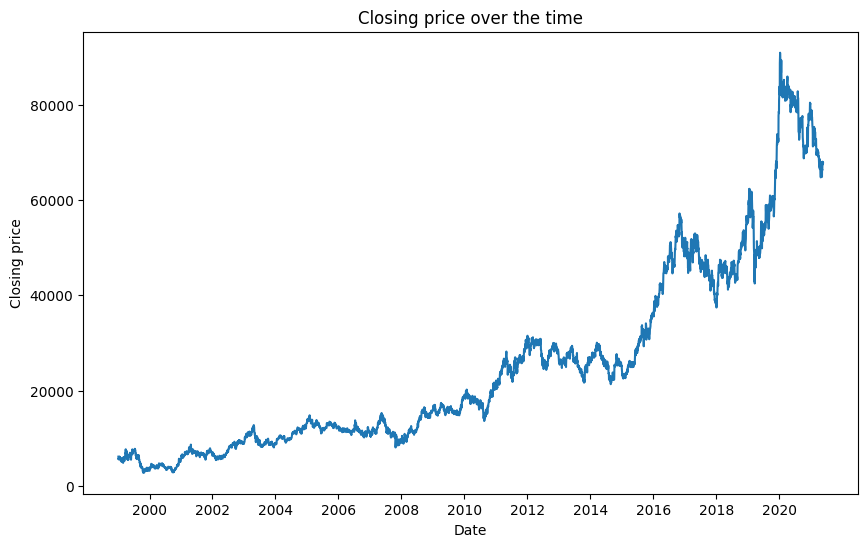

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x= 'Date', y= 'Close',data= df)
xticks= pd.date_range(start=df['Date'].min(),end=df['Date'].max(),freq='2YE')
plt.xticks(xticks,xticks.strftime('%Y'))
plt.title('Closing price over the time')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.show()

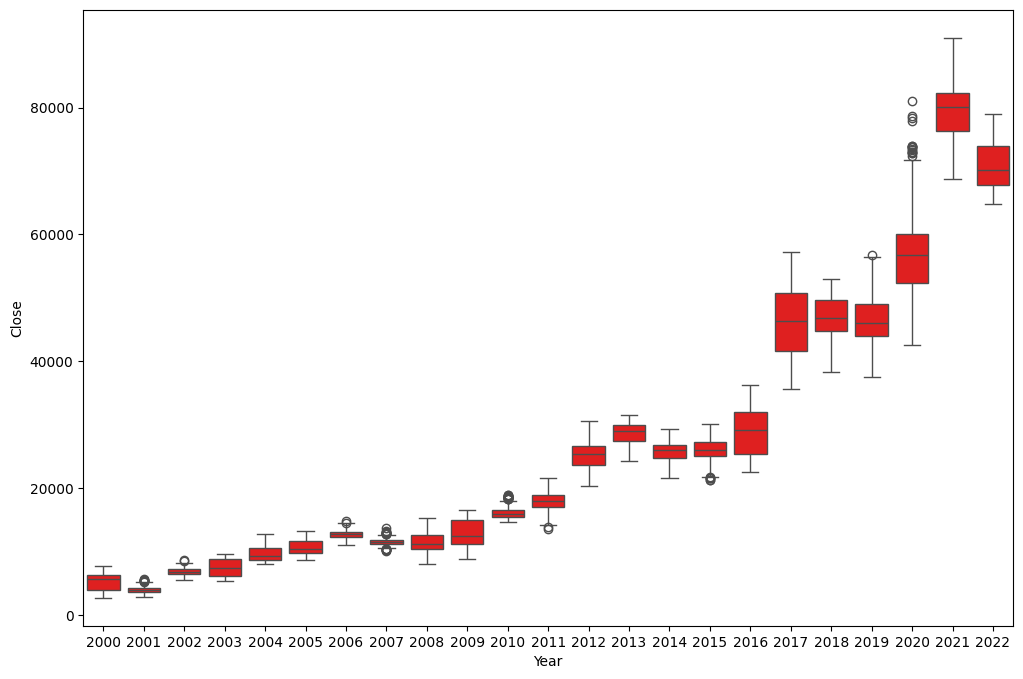

In [17]:
df['Year']= df['Date'].dt.year
plt.figure(figsize=(12,8))
sns.boxplot(x='Year',y= 'Close', data= df,color='red')
plt.show()

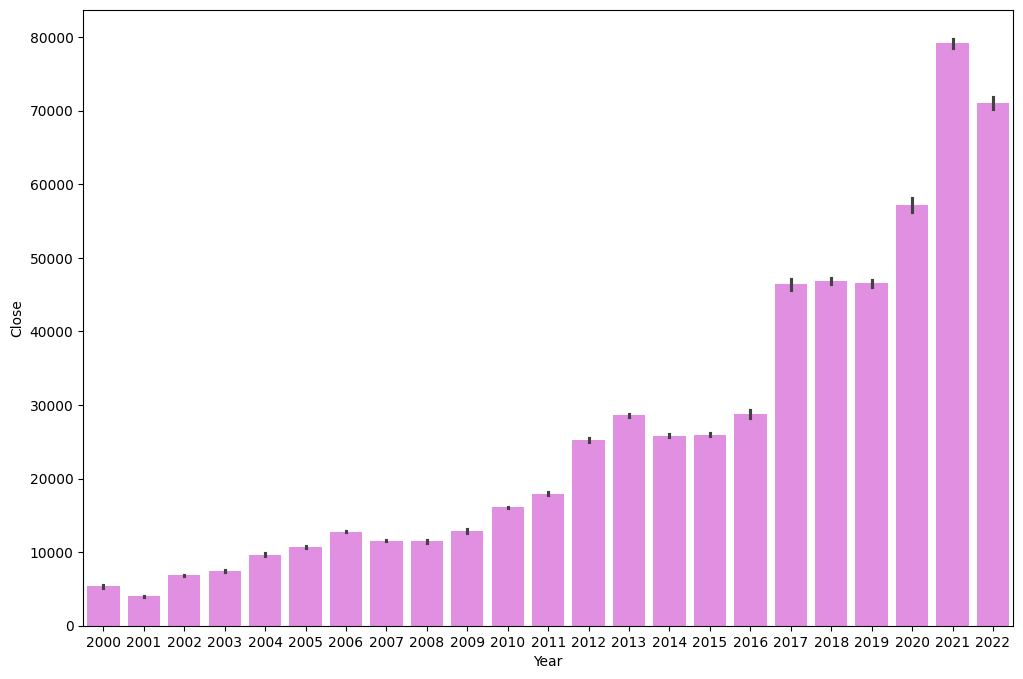

In [18]:
plt.figure(figsize= (12,8))
sns.barplot(x='Year',y='Close',data= df,color='violet')
plt.show()

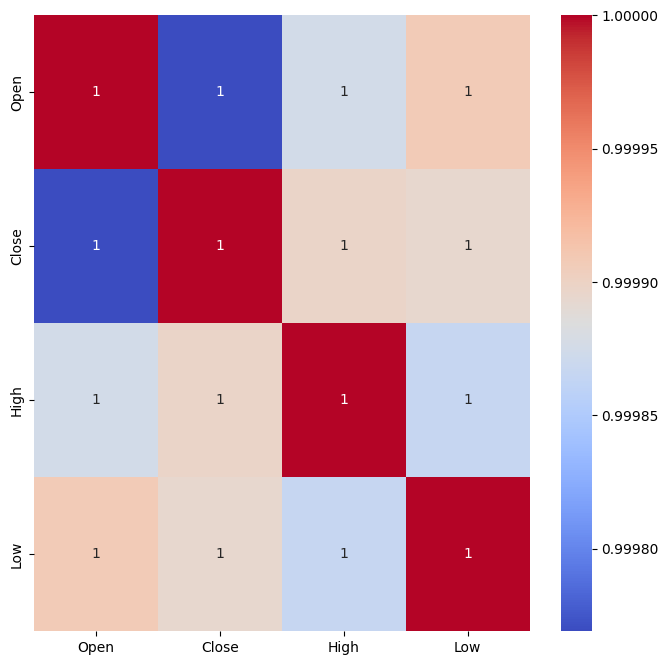

In [19]:
corr = df[['Open','Close','High','Low']].corr()
plt.figure(figsize=( 8, 8))
sns.heatmap(corr, annot=True , cmap='coolwarm')
plt.show()

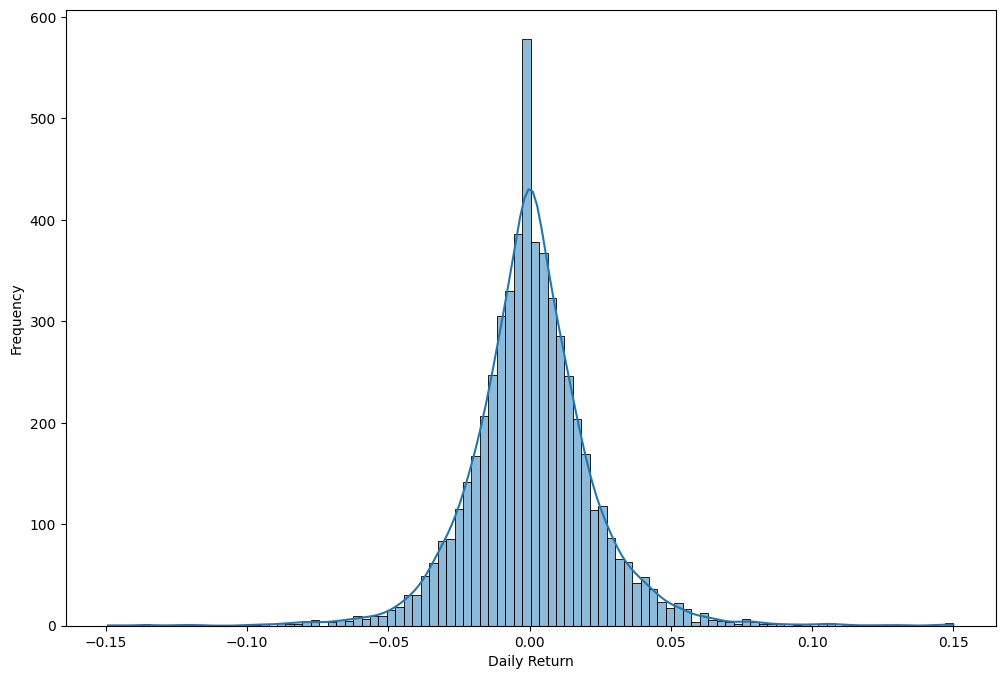

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(df['Close'].pct_change().dropna(), bins=100, kde=True)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

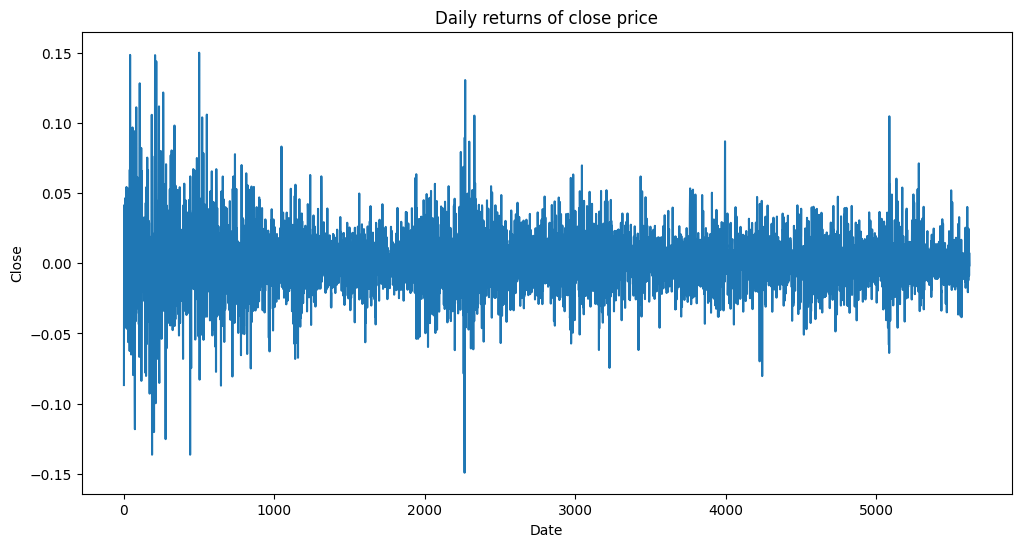

In [21]:
daily_returns = df['Close'].pct_change()
plt.figure(figsize=(12,6))
plt.plot(daily_returns.index,daily_returns.values)
plt.title('Daily returns of close price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

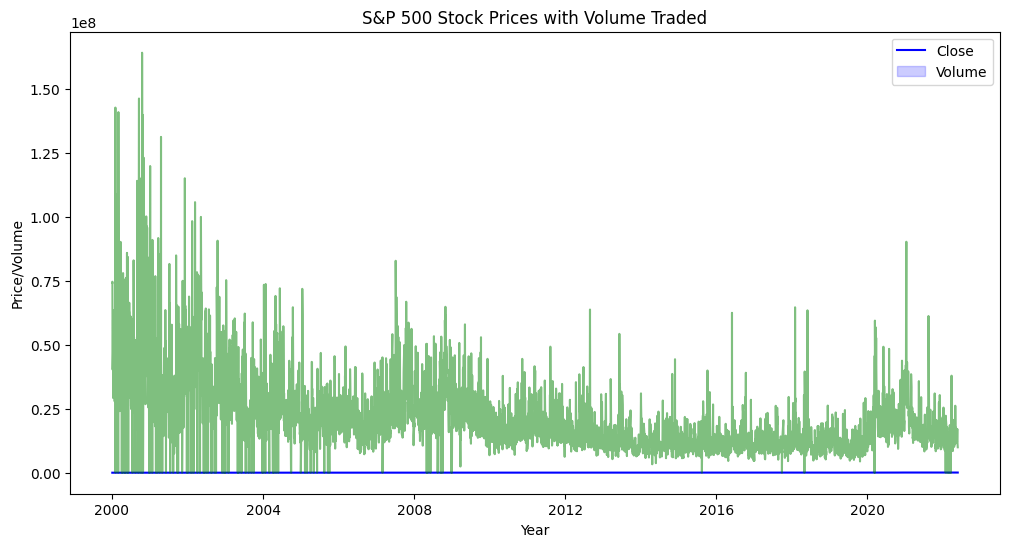

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Close', data=df, color='b',legend= True)
sns.lineplot(x='Date', y='Volume', data=df, color='g', alpha=0.5)
plt.title('S&P 500 Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Price/Volume')
plt.legend(['Close', 'Volume'])
plt.show()